___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

The domain you must have remembered it because you are worked on under project **"EDA for Car Price Prediction Model"**. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will use the data sets prepared for algorithms as a result of the EDA project.

So this study assumes that you are working on the EDA project and that you have sufficient domain knowledge.

Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this case, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression, Random Forest*** and ***XG Boost*** algorithms respectively. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 

## 1. Import Modules, Load Data and Data Review

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("final_scout_20200925.csv")

In [3]:
df.head()

,price,km,Gears,Previous_Owners,hp_kW,Inspection_new,age,Nr_of_Doors,Nr_of_Seats,Displacement_cc,...,Fuel_Electric,Fuel_LPG/CNG,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,5.0,2.0,66.0,1,3.0,5.0,5.0,1422.0,...,0,0,1,0,1,0,0,0,1,0
1,14500,80000.0,7.0,1.0,141.0,0,2.0,3.0,4.0,1798.0,...,0,0,1,0,1,0,0,0,1,0
2,14640,83450.0,5.0,1.0,85.0,0,3.0,4.0,4.0,1598.0,...,0,0,1,0,1,0,0,0,1,0
3,14500,73000.0,6.0,1.0,66.0,0,3.0,3.0,4.0,1422.0,...,0,0,1,0,1,0,0,0,1,0
4,16790,16200.0,5.0,1.0,66.0,1,3.0,5.0,5.0,1422.0,...,0,0,1,0,1,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Columns: 141 entries, price to Drive_chain_rear
dtypes: float64(9), int64(132)
memory usage: 17.1 MB


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [3]:
X = df.drop("price", axis=1)
y = df["price"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lm.intercept_

12051.223601961337

In [11]:
lm.coef_

array([-3.67420532e-02,  3.25971373e+02,  1.35365885e+02,  9.06854434e+01,
       -2.13075230e+02, -1.56087287e+03,  3.93573030e+02, -1.16217882e+02,
       -6.21436440e-01,  1.29549166e+02,  3.12892231e+02, -5.28407172e+02,
        6.40979897e+01,  2.33184968e+02, -3.60486903e+02,  1.71838458e+02,
       -1.22905942e+03, -8.82610668e+01,  1.27147267e+02,  6.11250887e+01,
        4.05467617e+02,  2.48848223e+03,  3.18279679e+02,  2.27425478e+02,
        2.21535472e+02, -5.20388820e+02,  1.56660474e+02,  1.46436956e+02,
       -4.39113716e+02,  4.68955395e+02,  1.53330724e+02,  3.55823428e+02,
       -1.91675461e+02,  6.29652174e+02, -3.33558451e+01,  1.08700406e+03,
        2.91096133e+02, -4.57352533e+02,  1.10140701e+02, -2.68315438e+02,
        3.53170851e+01,  8.53370067e+02, -1.81168544e+02, -2.06751637e+01,
        5.33208806e+02, -5.06196760e+00, -1.20270836e+03,  2.42564666e+02,
       -5.17974266e+02,  1.53700932e+02,  8.13720886e+02, -4.25425122e+01,
       -1.35416394e+02, -

In [12]:
y_pred=lm.predict(X_test)

In [13]:
eval_metrics(y_test, y_pred)

r2_score: 0.8872933071727149 
 mae: 1735.4536768414484 
 mse: 6046400.589845963 
 rmse: 2458.9429822275188


In [14]:
lm.score(X_train,y_train)

0.8901540547405136

In [15]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [16]:
compare.sample(10)

,Actual,Pred
6066,7690,9452.974884
273,17770,18323.376423
4395,19790,17448.536495
1583,22900,20776.548775
9282,8300,7864.626021
7425,14980,14781.519690
7856,23200,22435.856101
2578,21880,21910.721027
9623,9580,10936.162315
11895,23980,24034.167721


In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8854000794649306

In [19]:
accuraries

array([0.87797218, 0.88683678, 0.88667855, 0.88224508, 0.87700224,
       0.88674607, 0.89347713, 0.8878709 , 0.88809783, 0.88707402])

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [20]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
ridge_model = Ridge()

In [26]:
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [27]:
eval_metrics(y_test,y_pred)

r2_score: 0.8873807567418087 
 mae: 1735.1804600527294 
 mse: 6041709.163694713 
 rmse: 2457.9888453153553


In [28]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8854011804270596

In [29]:
alpha_space = np.linspace(0.1, 100, 100)
alpha_space

array([  0.1       ,   1.10909091,   2.11818182,   3.12727273,
         4.13636364,   5.14545455,   6.15454545,   7.16363636,
         8.17272727,   9.18181818,  10.19090909,  11.2       ,
        12.20909091,  13.21818182,  14.22727273,  15.23636364,
        16.24545455,  17.25454545,  18.26363636,  19.27272727,
        20.28181818,  21.29090909,  22.3       ,  23.30909091,
        24.31818182,  25.32727273,  26.33636364,  27.34545455,
        28.35454545,  29.36363636,  30.37272727,  31.38181818,
        32.39090909,  33.4       ,  34.40909091,  35.41818182,
        36.42727273,  37.43636364,  38.44545455,  39.45454545,
        40.46363636,  41.47272727,  42.48181818,  43.49090909,
        44.5       ,  45.50909091,  46.51818182,  47.52727273,
        48.53636364,  49.54545455,  50.55454545,  51.56363636,
        52.57272727,  53.58181818,  54.59090909,  55.6       ,
        56.60909091,  57.61818182,  58.62727273,  59.63636364,
        60.64545455,  61.65454545,  62.66363636,  63.67

In [30]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([  0.1       ,   1.10909091,   2.11818182,   3.12727273,
         4.13636364,   5.14545455,   6.15454545,   7.16363636,
         8.17272727,   9.18181818,  10.19090909,  11.2       ,
        12.20909091,  13.21818182,  14.22727273,  15.23636364,
        16.24545455,  17.25454545,  18.26363636,  19.27272727,
        20.28181818,  21.29090909,  22.3       ,  23.30909091,
        24.31818182,  25.32727273,  26.33636364,  27.34545455,
        28.35454545,  29.36363636...
        76.79090909,  77.8       ,  78.80909091,  79.81818182,
        80.82727273,  81.83636364,  82.84545455,  83.85454545,
        84.86363636,  85.87272727,  86.88181818,  87.89090909,
        88.9       ,  89.90909091,  90.91818182,  91.92727273,
        92.93636364,  93.94545455,  94.95454545,  95.96363636,
        96.97272727,  97.98181818,  98.99090909, 100.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [31]:
ridgecv.alpha_

64.68181818181817

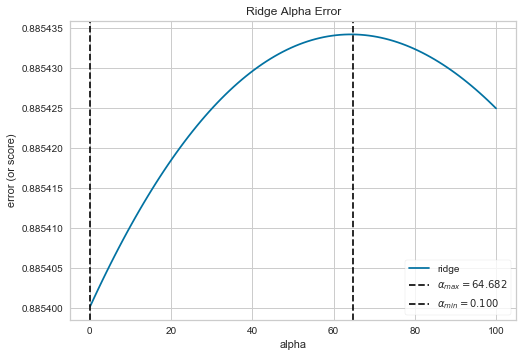

In [32]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 100, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [33]:
ridge_model = Ridge(64.68).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8874172653959355 
 mae: 1733.730485231567 
 mse: 6039750.575945317 
 rmse: 2457.590400360751


In [34]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.885434216315973

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [35]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [36]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8874127473727016 
 mae: 1734.5766959847786 
 mse: 6039992.955325469 
 rmse: 2457.6397122697763


In [37]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8854852490653057

In [38]:
alpha_space = np.linspace(0.1, 100, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)
lasso_cv_model.alpha_

9.181818181818182

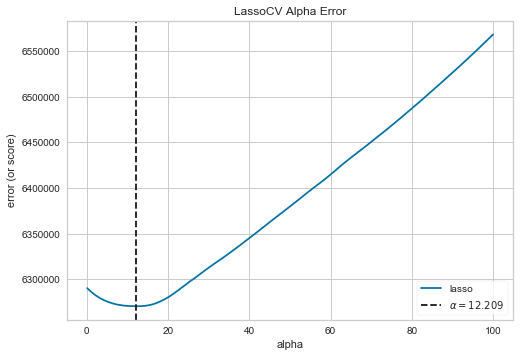

In [39]:
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against

alpha_space = np.linspace(0.1, 100, 100)

# Instantiate the linear model and visualizer

model = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [40]:
lasso_model = Lasso(9.18).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8874671639134869 
 mae: 1731.9443748020863 
 mse: 6037073.659265509 
 rmse: 2457.0457177809103


In [41]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8858073018382578

In [42]:
lasso_model = Lasso(12.2).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8873909380703995 
 mae: 1731.6563007195834 
 mse: 6041162.9637339795 
 rmse: 2457.877735717133


In [43]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8858131005238091

## 6.Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [8]:
rf_model = RandomForestRegressor().fit(X_train,y_train)

In [9]:
y_pred = rf_model.predict(X_test)

In [12]:
eval_metrics(y_test, y_pred)

r2_score: 0.9572012966803638 
 mae: 856.1901738585292 
 mse: 2309742.4668541523 
 rmse: 1519.7836908106865
